In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
x = Dense(128, activation = 'relu')(x)
prediction = Dense(4, activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                rescale=1/255.0,
                shear_range=0.2,
                vertical_flip=True,
                rotation_range=20,
                validation_split = 0.2,
 )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_path = '/content/drive/MyDrive/Deep Thesis (4-2)/Rice Dataset/train'
training_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "categorical",
    shuffle=True,
    subset="training",
)

Found 1352 images belonging to 4 classes.


In [ ]:
validation_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "categorical",
    shuffle=True,
    subset="validation",
)

Found 336 images belonging to 4 classes.


In [ ]:
test_path = '/content/drive/MyDrive/Deep Thesis (4-2)/Rice Dataset/validation'
test_set = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "categorical",
    shuffle=True,
)

Found 420 images belonging to 4 classes.


In [ ]:
result  = model.fit(
          training_set, 
          batch_size = 32,
          #validation_split = 0.2,
          validation_data = validation_set,
          epochs = 20)


Epoch 1/20
43/43 [==============================] - 946s 22s/step - loss: 1.9918 - accuracy: 0.4948 - val_loss: 0.7250 - val_accuracy: 0.6667
Epoch 2/20
43/43 [==============================] - 927s 22s/step - loss: 0.7762 - accuracy: 0.6428 - val_loss: 0.5870 - val_accuracy: 0.7619
Epoch 3/20
43/43 [==============================] - 943s 22s/step - loss: 0.6626 - accuracy: 0.7189 - val_loss: 0.6094 - val_accuracy: 0.7649
Epoch 4/20
43/43 [==============================] - 941s 22s/step - loss: 0.6079 - accuracy: 0.7567 - val_loss: 0.6325 - val_accuracy: 0.7321
Epoch 5/20
43/43 [==============================] - 923s 22s/step - loss: 0.4732 - accuracy: 0.8077 - val_loss: 0.5616 - val_accuracy: 0.7768
Epoch 6/20
43/43 [==============================] - 922s 22s/step - loss: 0.5419 - accuracy: 0.7655 - val_loss: 0.6427 - val_accuracy: 0.7470
Epoch 7/20
43/43 [==============================] - 921s 21s/step - loss: 0.4546 - accuracy: 0.8070 - val_loss: 0.5386 - val_accuracy: 0.7827
Epoch 

In [ ]:
acc = model.evaluate(test_set)
print(acc)

14/14 [==============================] - 232s 16s/step - loss: 0.4980 - accuracy: 0.8238
[0.49796393513679504, 0.8238095045089722]


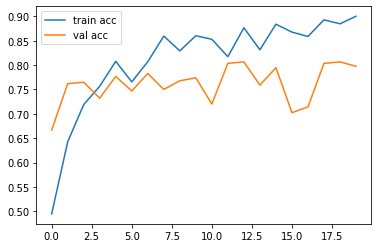

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

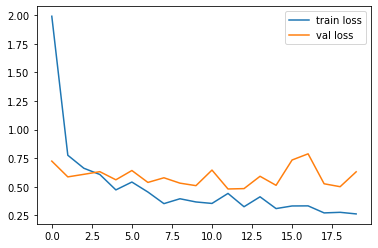

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')